# 导入库

In [1]:
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


In [2]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from tqdm.notebook import trange, tnrange,tqdm
import multiprocessing as mp
from copy import *
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist, squareform

During startup - Warning messages:
1: package ‘methods’ was built under R version 4.2.3 
2: package ‘datasets’ was built under R version 4.2.3 
3: package ‘utils’ was built under R version 4.2.3 
4: package ‘grDevices’ was built under R version 4.2.3 
5: package ‘graphics’ was built under R version 4.2.3 
6: package ‘stats’ was built under R version 4.2.3 
7: package ‘stats’ in options("defaultPackages") was not found 


# 读取文件

In [3]:
data = pd.read_csv(r'/mnt/data4/disk/zhxyu8/lung_progenitor_diff_lineage/result/fig5/modelta/hesc.cbrad5.gene.exp.csv', index_col=0)#,sep=',',header='infer',usecols=[5])

# 因为行可以重复，按行操作

In [4]:
data = data.T

In [5]:
data

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
A1-CBRAD5_AAACCCAAGCTTTGTG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
A1-CBRAD5_AAACCCAGTTTACTTC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
A1-CBRAD5_AAACGAAAGTCCGCCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
A1-CBRAD5_AAACGAACAAGGTCAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.267756,0.0,0.0,0.186218,0.0,0.0
A1-CBRAD5_AAACGAACATCCGGCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.904237,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GS-HESC_TTTGTCACAAAGAATC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
GS-HESC_TTTGTCACAATGACCT-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
GS-HESC_TTTGTCACAGTCAGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
GS-HESC_TTTGTCAGTCGTTGTA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [6]:
# data.index
# data.mean()
# data.std()

In [7]:
# 加载RDS文件
rds_file = ro.r['readRDS']('/mnt/data4/disk/zhxyu8/lung_progenitor_diff_lineage/result/fig2/PERMANOVA/all_tree_info_renameCelltype.Rds')

# 将RDS文件转换为DataFrame对象
pandas2ri.activate()
dfr = pandas2ri.rpy2py(rds_file)

# 打印DataFrame
dfr

#dfr.iloc[0,2]

,label,BC,sample,celltype,to,from,type,depth,from.depth,height,from.height
1,1,None,GS-HESC,inter,GS-HESC_1789,GS-HESC_1788,inode,2.0,1.0,8.0,13.0
2,1,None,GS-HESC,inter,GS-HESC_2270,GS-HESC_1788,inode,2.0,1.0,12.0,13.0
3,1,None,GS-HESC,inter,GS-HESC_2301,GS-HESC_1788,inode,2.0,1.0,10.0,13.0
4,1,None,GS-HESC,inter,GS-HESC_2317,GS-HESC_1788,inode,2.0,1.0,6.0,13.0
5,1,None,GS-HESC,inter,GS-HESC_2322,GS-HESC_1788,inode,2.0,1.0,3.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...
11887,N958_3,TTGGGTACAAATCGGG,A1-CBRAD5,R2,A1-CBRAD5_N958_3_TTGGGTACAAATCGGG,A1-CBRAD5_add_N958_3,leaf,3.0,2.0,NaN,2.0
11888,N958_3,TCACTATCAGCCTACG,A1-CBRAD5,C2,A1-CBRAD5_N958_3_TCACTATCAGCCTACG,A1-CBRAD5_add_N958_3,leaf,3.0,2.0,NaN,2.0
11889,N958_3,GCATCGGAGCCAGAGT,A1-CBRAD5,R2,A1-CBRAD5_N958_3_GCATCGGAGCCAGAGT,A1-CBRAD5_add_N958_3,leaf,3.0,2.0,NaN,2.0
11890,WT,CTGAGCGCAGCTTCCT,A1-CBRAD5,R2,A1-CBRAD5_WT_CTGAGCGCAGCTTCCT,A1-CBRAD5_add_WT,leaf,3.0,2.0,NaN,2.0


In [8]:
my_dict = {}
for i in tnrange(len(dfr)):
    #my_dict['{}_{}-1'.format(data2[2][i],data2[1][i])] = '{}_{}'.format(data2[2][i],data2[3][i])
    my_dict['{}_{}-1'.format(dfr.iloc[i, 2], dfr.iloc[i, 1])] = dfr.iloc[i,3]
    
for i in data.index:
    if not my_dict.get (i):
        my_dict[i] = 'None'

  0%|          | 0/11891 [00:00<?, ?it/s]

# 剔除没有类型的行，并且把行名改为类型名

In [9]:
df = data.rename(index=my_dict)

In [10]:
df = df.drop(labels=['None'], axis=0)

In [11]:
df

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.267756,0.0,0.0,0.186218,0.0,0.0
R1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.904237,0.0,0.0,0.000000,0.0,0.0
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.120423,0.0,0.0,0.000000,0.0,0.0
R2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
C1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.451570,0.0,0.0,0.000000,0.0,0.0
C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


In [12]:
# df.mean()
# df.std()

# 标准化数据（但是由于本来就是标准化但非正态）

In [13]:
# # 创建标准化器对象
# scaler = StandardScaler()

# # 对数据进行标准化
# scaled_data = scaler.fit_transform(df)

# # 转换为标准化后的 DataFrame
# scaled_df = pd.DataFrame(data=scaled_data, columns=df.columns, index = df.index)
# print(scaled_df.mean(), scaled_df.std())

# scaled_df

# 像不像函数

In [14]:
like = []
unlike = []

def whichpart(celltype1):
    unlike_part = ['C1','C2','C3','C4','C5','R1','R2']
    if celltype1 in unlike_part:
        return 'A'
    else:
        return 'B'

# 计算距离的函数

In [15]:
# # 计算欧氏距离
# def euclidean_distance(a, b):
#     return np.sqrt(np.sum((a - b) ** 2))

# # 计算皮尔森距离
# def PearsonCorrelation(x, y):
#     import numpy as np
#     x = np.array(x)
#     y = np.array(y)
#     x_ = x - np.mean(x)
#     y_ = y - np.mean(y)
#     norm_x = np.linalg.norm(x_)
#     norm_y = np.linalg.norm(y_)
#     if norm_x == 0 or norm_y == 0:
#         return 1
#     else:
#         return np.dot(x_, y_) / (norm_x * norm_y)

In [16]:
# case = int(input("请选择计算方式：欧氏距离请输入1，皮尔斯距离请输入2。您的输入为："))

In [17]:
# # 计算距离矩阵的一行
# def calc_row_distance(data):
#     i, row, matrix, case = data
#     distances = []
#     for k in range(i):
#         distances.append(0)
#     for j in range(i, matrix.shape[0]):
#         if case == 1:
#             distance = euclidean_distance(row, matrix.values[j])
#         elif case == 2:
#             distance = PearsonCorrelation(row, matrix.values[j])
#         distances.append(distance)
#     return (i, distances)

# # 计算距离矩阵
# def calc_distance_matrix(matrix, num_processes, case):
#     pool = mp.Pool(processes=num_processes)
#     rows = [(i, matrix.values[i], matrix, case) for i in range(matrix.shape[0])]
#     results = pool.map(calc_row_distance, rows)
#     pool.close()
#     pool.join()

#     # 构造距离矩阵
#     distances = []
#     for result in results:
#         distances.append(result[1])
#     return pd.DataFrame(distances, columns=matrix.index, index=matrix.index)

In [18]:
# import datetime
# start = datetime.datetime.now()
# distance_matrix = calc_distance_matrix(df1, num_processes=10, case = case)
# d_matrix=distance_matrix + distance_matrix.T
# #distance_matrix
# if case == 1:
#     d_matrix.to_csv('dis_matrix_ou.csv')
# elif case == 2:
#     d_matrix.to_csv('dis_matrix_pearson.csv')
# end = datetime.datetime.now()
# print('totally time is ' + str(end - start))

# 测试样例

In [19]:
# data = np.random.rand(100, 1000)
# df1 = pd.DataFrame(data)
df1 = df.iloc[:100, :100]
# df1.to_csv('df1.csv', encoding='utf-8')
df1

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AL590822.1,SKI,MORN1,RER1,PEX10,PLCH2,AL139246.1,AL139246.4,PANK4,HES5
C6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.247175,0.247175,0.610422,0.000000,0.0,0.0,0.0,0.0,0.0
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.606875,0.000000,0.0,0.0,0.0,0.0,0.0
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.186218,0.097438,1.325283,0.097438,0.0,0.0,0.0,0.0,0.0
R1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.127189,0.000000,0.433422,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,1.430954,0.000000,0.0,0.0,0.0,0.0,0.0
C9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.461841,0.0,0.0,0.0,0.0,0.0
C7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.352914,0.613247,0.000000,0.0,0.0,0.0,0.0,0.0
C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


# 下面这种方式计算的欧氏距离太久了

In [20]:
# 计算每一行与数据中任何一行的欧氏距离
# distances_ou = cdist(scaled_df, scaled_df, metric='euclidean')

# distances_ou

# 计算欧氏距离

In [21]:
import pandas as pd
from sklearn.metrics.pairwise import pairwise_distances

# 创建示例 DataFrame，使用随机数填充
# data = pd.DataFrame(np.random.rand(9000, 30000))

# 计算每一行与数据中任何一行的欧氏距离
distances_euclidean = pd.DataFrame(pairwise_distances(df, metric='euclidean'), index = df.index, columns = df.index)

distances_euclidean.to_csv('df_euclidean.csv', encoding='utf-8')
distances_euclidean

,C6,C7,C7,R1,C7,C7,R1,C7,C2,C10,...,C2,C2,C2,C2,C2,C2,R2,C1,C2,C2
C6,0.000000,37.034715,35.498840,59.753060,31.124031,38.649976,63.005610,38.551426,53.509576,31.904855,...,39.816425,40.131269,40.494035,39.819305,37.187622,36.446425,60.463812,38.251802,38.121718,38.944572
C7,37.034715,0.000000,34.340282,60.689821,30.470831,39.221603,62.578607,35.682556,55.350831,39.510264,...,42.503168,42.870667,42.743863,42.794543,40.117333,39.466883,62.085148,41.691358,40.693154,41.754466
C7,35.498840,34.340282,0.000017,58.787301,27.599516,35.604782,58.375361,33.356243,53.521618,37.424365,...,38.147018,39.469184,38.214154,38.644521,35.837094,35.128149,60.390318,36.552185,36.587068,37.289976
R1,59.753060,60.689821,58.787301,0.000000,57.345106,60.755523,72.556445,60.966321,68.888333,62.211262,...,60.185125,60.591525,60.356287,61.060669,59.567886,58.422026,71.883366,60.093425,59.540641,61.019805
C7,31.124031,30.470831,27.599516,57.345106,0.000000,33.311601,59.520094,30.048774,51.916764,32.916730,...,37.794760,38.343998,38.359655,38.093701,35.437005,34.350198,59.694994,36.473936,35.961882,36.838223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,36.446425,39.466883,35.128149,58.422026,34.350198,36.719157,60.006569,40.672317,50.829286,38.784357,...,24.494063,26.659221,26.447377,26.651483,21.349859,0.000000,53.344232,23.569572,21.746829,25.230363
R2,60.463812,62.085148,60.390318,71.883366,59.694994,62.006408,70.681203,63.054379,66.563059,62.843829,...,55.896891,56.250017,56.372181,56.461092,54.613595,53.344232,0.000008,56.180160,54.445171,56.195255
C1,38.251802,41.691358,36.552185,60.093425,36.473936,38.492226,62.849884,42.737296,52.755003,40.902243,...,28.025229,30.147023,29.287847,29.353133,24.927667,23.569572,56.180160,0.000017,26.212725,28.115141
C2,38.121718,40.693154,36.587068,59.540641,35.961882,37.930468,60.930435,42.173473,52.024419,40.947344,...,26.884425,28.615786,28.106483,28.070372,23.861805,21.746829,54.445171,26.212725,0.000015,27.599144


# 计算欧氏距离 -log(x + 1) 处理

In [22]:
distances_euclidean_copy = deepcopy(distances_euclidean)
distances_euclidean_log = distances_euclidean_copy.applymap(lambda x: -np.log(x+1))

distances_euclidean_log.to_csv('df_euclidean_log.csv', encoding='utf-8')
distances_euclidean_log

,C6,C7,C7,R1,C7,C7,R1,C7,C2,C10,...,C2,C2,C2,C2,C2,C2,R2,C1,C2,C2
C6,-0.000000,-3.638499,-3.597280,-4.106817,-3.469604,-3.680090,-4.158971,-3.677602,-3.998376,-3.493620,...,-3.709085,-3.716769,-3.725550,-3.709155,-3.642511,-3.622911,-4.118449,-3.669997,-3.666678,-3.687493
C7,-3.638499,-0.000000,-3.565023,-4.122119,-3.449061,-3.694404,-4.152277,-3.602301,-4.031597,-3.701555,...,-3.772834,-3.781246,-3.778351,-3.779509,-3.716430,-3.700484,-4.144485,-3.753997,-3.730337,-3.755474
C7,-3.597280,-3.565023,-0.000017,-4.090793,-3.353390,-3.600179,-4.083879,-3.536784,-3.998597,-3.648692,...,-3.667324,-3.700541,-3.669038,-3.679953,-3.606505,-3.587072,-4.117252,-3.625732,-3.626660,-3.645188
R1,-4.106817,-4.122119,-4.090793,-0.000000,-4.066375,-4.123183,-4.298053,-4.126591,-4.246899,-4.146482,...,-4.113904,-4.120524,-4.116698,-4.128112,-4.103765,-4.084665,-4.288860,-4.112404,-4.103315,-4.127454
C7,-3.469604,-3.449061,-3.353390,-4.066375,-0.000000,-3.535484,-4.102975,-3.435559,-3.968720,-3.523908,...,-3.658285,-3.672343,-3.672741,-3.665961,-3.595585,-3.565304,-4.105861,-3.623646,-3.609887,-3.633320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,-3.622911,-3.700484,-3.587072,-4.084665,-3.565304,-3.630168,-4.110982,-3.729837,-3.947955,-3.683474,...,-3.238446,-3.319959,-3.312271,-3.319679,-3.106820,-0.000000,-3.995338,-3.201509,-3.124426,-3.266918
R2,-4.118449,-4.144485,-4.117252,-4.288860,-4.105861,-4.143236,-4.272229,-4.159732,-4.213061,-4.156440,...,-4.041241,-4.047428,-4.049560,-4.051108,-4.018428,-3.995338,-0.000008,-4.046207,-4.015395,-4.046471
C1,-3.669997,-3.753997,-3.625732,-4.112404,-3.623646,-3.676104,-4.156535,-3.778201,-3.984437,-3.735339,...,-3.368165,-3.438719,-3.410747,-3.412900,-3.255311,-3.201509,-4.046207,-0.000017,-3.303685,-3.371258
C2,-3.666678,-3.730337,-3.626660,-4.103315,-3.609887,-3.661777,-4.126012,-3.765226,-3.970753,-3.736415,...,-3.328068,-3.388308,-3.370961,-3.369719,-3.213333,-3.124426,-4.015395,-3.303685,-0.000015,-3.353377


# 计算皮尔森相关系数

In [23]:
# 计算皮尔森距离
pearson_list = pdist(df, metric='correlation')

pearson = pd.DataFrame(squareform(pearson_list))#, index = df1.index, columns = df1.index)
np.fill_diagonal(pearson.values, 1)

pearson.to_csv('df_pearson.csv', encoding='utf-8')
pearson

,0,1,2,3,4,5,6,7,8,9,...,9644,9645,9646,9647,9648,9649,9650,9651,9652,9653
0,1.000000,0.173999,0.164278,0.402418,0.128176,0.185141,0.477282,0.188389,0.334474,0.129747,...,0.203198,0.205779,0.209385,0.202017,0.178944,0.176615,0.432136,0.187147,0.189019,0.193275
1,0.173999,1.000000,0.150280,0.410341,0.119575,0.187549,0.463567,0.158242,0.353762,0.194845,...,0.227478,0.230890,0.229325,0.229444,0.204444,0.202818,0.449832,0.218390,0.211369,0.218291
2,0.164278,0.150280,1.000000,0.391469,0.101324,0.157684,0.410445,0.141568,0.336790,0.179387,...,0.187714,0.200433,0.187620,0.191522,0.167334,0.165340,0.434147,0.171940,0.175337,0.178272
3,0.402418,0.410341,0.391469,1.000000,0.374964,0.405647,0.587658,0.412578,0.512841,0.427894,...,0.412842,0.419017,0.415163,0.424094,0.407019,0.399896,0.567557,0.409503,0.409034,0.421345
4,0.128176,0.119575,0.101324,0.374964,1.000000,0.139153,0.431936,0.116159,0.319151,0.140795,...,0.186512,0.191329,0.191317,0.188244,0.165706,0.160552,0.428303,0.173285,0.171614,0.176025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,0.176615,0.202818,0.165340,0.399896,0.160552,0.170813,0.454035,0.214739,0.313674,0.194566,...,0.079567,0.094270,0.092602,0.093723,0.061206,1.000000,0.350244,0.073112,0.064124,0.083463
9650,0.432136,0.449832,0.434147,0.567557,0.428303,0.441740,0.586944,0.462327,0.501052,0.456393,...,0.373212,0.378767,0.379832,0.379993,0.358570,0.350244,1.000000,0.374698,0.358811,0.373782
9651,0.187147,0.218390,0.171940,0.409503,0.173285,0.182288,0.478466,0.228839,0.326905,0.209200,...,0.100564,0.116183,0.109535,0.109788,0.080271,0.073112,0.374698,1.000000,0.089201,0.100494
9652,0.189019,0.211369,0.175337,0.409034,0.171614,0.179407,0.459126,0.226312,0.323576,0.212598,...,0.094370,0.106844,0.102919,0.102357,0.075149,0.064124,0.358811,0.089201,1.000000,0.098488


# 计算皮尔森距离 1-pearson

In [24]:
pearson_copy = deepcopy(pearson)
distances_pearson = pearson_copy.applymap(lambda x: 1 - x)

distances_pearson.to_csv('distances_pearson.csv', encoding='utf-8')
distances_pearson

,0,1,2,3,4,5,6,7,8,9,...,9644,9645,9646,9647,9648,9649,9650,9651,9652,9653
0,0.000000,0.826001,0.835722,0.597582,0.871824,0.814859,0.522718,0.811611,0.665526,0.870253,...,0.796802,0.794221,0.790615,0.797983,0.821056,0.823385,0.567864,0.812853,0.810981,0.806725
1,0.826001,0.000000,0.849720,0.589659,0.880425,0.812451,0.536433,0.841758,0.646238,0.805155,...,0.772522,0.769110,0.770675,0.770556,0.795556,0.797182,0.550168,0.781610,0.788631,0.781709
2,0.835722,0.849720,0.000000,0.608531,0.898676,0.842316,0.589555,0.858432,0.663210,0.820613,...,0.812286,0.799567,0.812380,0.808478,0.832666,0.834660,0.565853,0.828060,0.824663,0.821728
3,0.597582,0.589659,0.608531,0.000000,0.625036,0.594353,0.412342,0.587422,0.487159,0.572106,...,0.587158,0.580983,0.584837,0.575906,0.592981,0.600104,0.432443,0.590497,0.590966,0.578655
4,0.871824,0.880425,0.898676,0.625036,0.000000,0.860847,0.568064,0.883841,0.680849,0.859205,...,0.813488,0.808671,0.808683,0.811756,0.834294,0.839448,0.571697,0.826715,0.828386,0.823975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9649,0.823385,0.797182,0.834660,0.600104,0.839448,0.829187,0.545965,0.785261,0.686326,0.805434,...,0.920433,0.905730,0.907398,0.906277,0.938794,0.000000,0.649756,0.926888,0.935876,0.916537
9650,0.567864,0.550168,0.565853,0.432443,0.571697,0.558260,0.413056,0.537673,0.498948,0.543607,...,0.626788,0.621233,0.620168,0.620007,0.641430,0.649756,0.000000,0.625302,0.641189,0.626218
9651,0.812853,0.781610,0.828060,0.590497,0.826715,0.817712,0.521534,0.771161,0.673095,0.790800,...,0.899436,0.883817,0.890465,0.890212,0.919729,0.926888,0.625302,0.000000,0.910799,0.899506
9652,0.810981,0.788631,0.824663,0.590966,0.828386,0.820593,0.540874,0.773688,0.676424,0.787402,...,0.905630,0.893156,0.897081,0.897643,0.924851,0.935876,0.641189,0.910799,0.000000,0.901512


# 获取所有最像和最不像的列表

In [41]:
d_matrix = distances_euclidean_log
d_matrix

,C6,C7,C7,R1,C7,C7,R1,C7,C2,C10,...,C2,C2,C2,C2,C2,C2,R2,C1,C2,C2
C6,-0.000000,-3.638499,-3.597280,-4.106817,-3.469604,-3.680090,-4.158971,-3.677602,-3.998376,-3.493620,...,-3.709085,-3.716769,-3.725550,-3.709155,-3.642511,-3.622911,-4.118449,-3.669997,-3.666678,-3.687493
C7,-3.638499,-0.000000,-3.565023,-4.122119,-3.449061,-3.694404,-4.152277,-3.602301,-4.031597,-3.701555,...,-3.772834,-3.781246,-3.778351,-3.779509,-3.716430,-3.700484,-4.144485,-3.753997,-3.730337,-3.755474
C7,-3.597280,-3.565023,-0.000017,-4.090793,-3.353390,-3.600179,-4.083879,-3.536784,-3.998597,-3.648692,...,-3.667324,-3.700541,-3.669038,-3.679953,-3.606505,-3.587072,-4.117252,-3.625732,-3.626660,-3.645188
R1,-4.106817,-4.122119,-4.090793,-0.000000,-4.066375,-4.123183,-4.298053,-4.126591,-4.246899,-4.146482,...,-4.113904,-4.120524,-4.116698,-4.128112,-4.103765,-4.084665,-4.288860,-4.112404,-4.103315,-4.127454
C7,-3.469604,-3.449061,-3.353390,-4.066375,-0.000000,-3.535484,-4.102975,-3.435559,-3.968720,-3.523908,...,-3.658285,-3.672343,-3.672741,-3.665961,-3.595585,-3.565304,-4.105861,-3.623646,-3.609887,-3.633320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C2,-3.622911,-3.700484,-3.587072,-4.084665,-3.565304,-3.630168,-4.110982,-3.729837,-3.947955,-3.683474,...,-3.238446,-3.319959,-3.312271,-3.319679,-3.106820,-0.000000,-3.995338,-3.201509,-3.124426,-3.266918
R2,-4.118449,-4.144485,-4.117252,-4.288860,-4.105861,-4.143236,-4.272229,-4.159732,-4.213061,-4.156440,...,-4.041241,-4.047428,-4.049560,-4.051108,-4.018428,-3.995338,-0.000008,-4.046207,-4.015395,-4.046471
C1,-3.669997,-3.753997,-3.625732,-4.112404,-3.623646,-3.676104,-4.156535,-3.778201,-3.984437,-3.735339,...,-3.368165,-3.438719,-3.410747,-3.412900,-3.255311,-3.201509,-4.046207,-0.000017,-3.303685,-3.371258
C2,-3.666678,-3.730337,-3.626660,-4.103315,-3.609887,-3.661777,-4.126012,-3.765226,-3.970753,-3.736415,...,-3.328068,-3.388308,-3.370961,-3.369719,-3.213333,-3.124426,-4.015395,-3.303685,-0.000015,-3.353377


In [26]:
all_list = []
like = []
unlike = []
get_cellpair_mean = {}

with tqdm(total=((1+d_matrix.shape[1])*d_matrix.shape[1])/2,desc='all_list') as pbar:
    for i in range(d_matrix.shape[1]):
        for j in range(i+1):
            if get_cellpair_mean.get(str(d_matrix.index[i]) + '_' + str(d_matrix.index[j])):
                get_cellpair_mean[str(d_matrix.index[i]) + '_' + str(d_matrix.index[j])].append(d_matrix.values[i][j])
            elif get_cellpair_mean.get(str(d_matrix.index[j]) + '_' + str(d_matrix.index[i])):
                get_cellpair_mean[str(d_matrix.index[j]) + '_' + str(d_matrix.index[i])].append(d_matrix.values[i][j])
            else:
                get_cellpair_mean[str(d_matrix.index[i]) + '_' + str(d_matrix.index[j])] = []
                get_cellpair_mean[str(d_matrix.index[i]) + '_' + str(d_matrix.index[j])].append(d_matrix.values[i][j])
            
            all_list.append(d_matrix.values[j][i])
            if d_matrix.index[i] == d_matrix.index[j]:
                like.append(d_matrix.values[j][i])
            elif whichpart(d_matrix.index[i]) != (whichpart(d_matrix.index[j])):
                unlike.append(d_matrix.values[j][i])
            pbar.update()

all_list:   0%|          | 0/46604685.0 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [27]:
get_cellpair_mean_result = {}
for (k,v) in get_cellpair_mean.items():
    get_cellpair_mean_result[k] = sum(v)/len(v)
    # print(k,':', sum(v)/len(v))
get_cellpair_mean_result

{'C6_C6': -3.5013677608845075,
 'C7_C6': -3.5961183243863495,
 'C7_C7': -3.5449948572677883,
 'R1_C6': -3.9975446327278936,
 'R1_C7': -3.9913834059619795,
 'R1_R1': -4.100308158567272,
 'C2_C6': -3.70669440974354,
 'C2_C7': -3.7321721984388128,
 'C2_R1': -4.001292810314522,
 'C2_C2': -3.4021466065786763,
 'C10_C6': -3.5886049958488337,
 'C10_C7': -3.6336980726058092,
 'C10_R1': -4.005976173837762,
 'C10_C2': -3.712028408277337,
 'C10_C10': -3.524976455006982,
 'C8_C6': -3.671900148335479,
 'C8_C7': -3.6921548198555936,
 'C8_R1': -4.019291164762459,
 'C8_C2': -3.730259350400305,
 'C8_C10': -3.5881465579370158,
 'C8_C8': -3.453241985167787,
 'C1_C6': -3.696340837536259,
 'C1_C7': -3.7218009669746728,
 'C1_R1': -3.9940518695045832,
 'C1_C2': -3.384205830404491,
 'C1_C10': -3.6980278876148733,
 'C1_C8': -3.717109847046728,
 'C1_C1': -3.336718914890668,
 'C9_C6': -3.592033759538209,
 'C9_C7': -3.60100361200568,
 'C9_R1': -3.9981513718792576,
 'C9_C2': -3.7022971861095857,
 'C9_C10': -3.5696

In [28]:
print(len(all_list))

46604685


In [29]:
print(len(like))

7407914


In [30]:
like.sort()
unlike.sort()

In [31]:
like[round(len(like)*0.1)]

-3.9178412613229336

In [32]:
like[round(len(like)*0.15)]

-3.7435938014428394

In [33]:
like[round(len(like)*0.20)]

-3.636877969710971

In [34]:
unlike[round(len(unlike)*0.9)]

-3.582603559511694

In [35]:
unlike[round(len(unlike)*0.85)]

-3.605182396074322

In [36]:
unlike[round(len(unlike)*0.80)]

-3.6235592019068115

In [37]:
print(len(unlike))

22874825


In [38]:
# import matplotlib.pyplot as plt
# import seaborn as sns


# # 绘制频率分布直方图
# plt.figure(figsize=(20, 10))

# plt.hist(all_list, bins=range(min(all_list).astype(int), max(all_list).astype(int) + 2), alpha=0.5, label='AllData', density=True)
# plt.hist(like, bins=range(min(like).astype(int), max(like).astype(int) + 2), alpha=0.5, label='Like', density=True)
# plt.hist(unlike, bins=range(min(unlike).astype(int), max(unlike).astype(int) + 2), alpha=0.5, label='Unlike', density=True)

# plt.xlabel('Score')
# plt.ylabel('Frequency')
# plt.title('Frequency Distribution Histogram')
# plt.legend()
# plt.show()
# plt.savefig('a.png')

# # 绘制核密度图
# plt.figure(figsize=(20, 10))

# sns.kdeplot(all_list, shade=True, label='AllData')
# sns.kdeplot(like, shade=True, label='Like')
# sns.kdeplot(unlike, shade=True, label='Unlike')

# plt.xlabel('Value')
# plt.ylabel('Density')
# plt.title('Kernel Density Estimation')
# plt.legend()
# plt.show()
# plt.savefig('b.png')

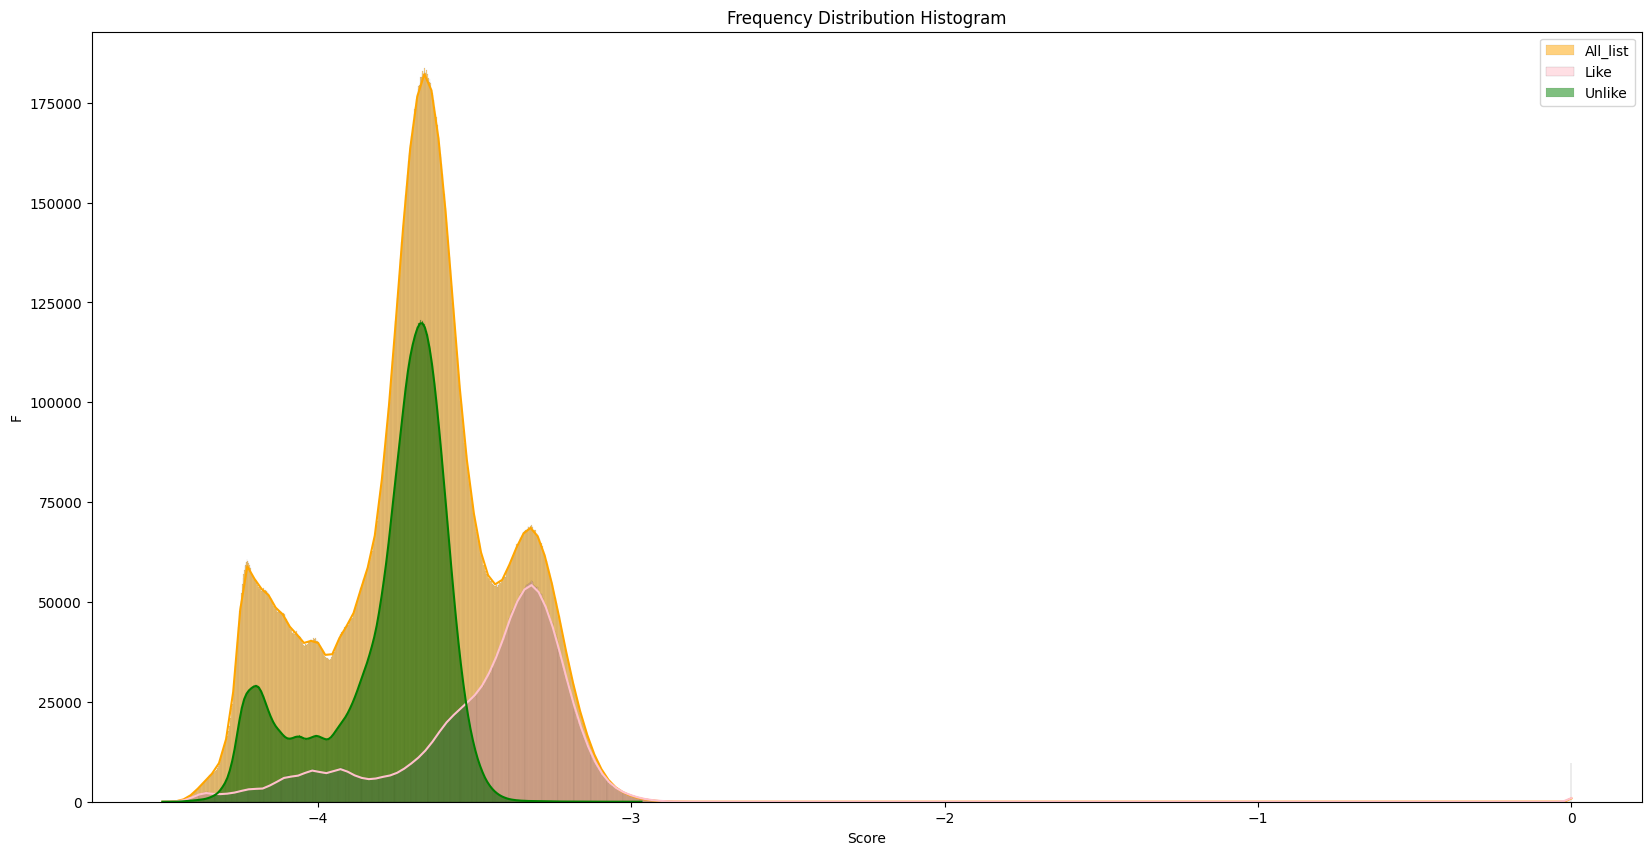

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
# import scipy.stats as stats

# 绘制频率分布直方图和曲线图
plt.figure(figsize=(20, 10))
sns.histplot(all_list, kde=True, color='orange', label='All_list')
sns.histplot(like, kde=True, color='pink', label='Like')
sns.histplot(unlike, kde=True, color='green', label='Unlike')

# 拟合并绘制曲线图
# plt.figure(figsize=(10, 6))
# fit1 = stats.norm.pdf(x, np.mean(all_list), np.std(all_list))
# fit2 = stats.norm.pdf(x, np.mean(like), np.std(like))
# fit3 = stats.norm.pdf(x, np.mean(unlike), np.std(unlike))
# plt.plot(x, fit1, '--', color='orange', label='All_list')
# plt.plot(x, fit2, '--', color='pink', label='Like')
# plt.plot(x, fit3, '--', color='green', label='Unlike')

plt.xlabel('Score')
plt.ylabel('F')
plt.title('Frequency Distribution Histogram')
plt.legend()
plt.savefig('result231212')
plt.show()